this is for extracting the dialogue in a script 

In [4]:
import re

file_path = 'E:/SE/Taxi_Driver.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    script_content = file.read()

# Refined extraction to exclude lines with "CUT TO" as the character's name
def extract_dialogues_exclude_cut_to(script):
    # Extract all text enclosed within <b>,</b> tags along with the following text until the next character's name
    pattern = re.compile(r'<b>\s*(.*?)\s*</b>([^<]*)', re.DOTALL)
    matches = pattern.findall(script)
    
    dialogues = []
    for match in matches:
        character, dialogue = match
        # Exclude lines where "CUT TO" is the character's name
        if character.strip().upper() == 'CUT TO:':
            continue
        if character.strip().upper() == 'FADE IN:':
            continue
        if character.strip().upper() == 'CUT BACK TO:':
            continue
        if character.strip().upper() == '':
            continue
        if character.strip().upper() == '&#12;':
            continue
        if character.strip().upper() == '<!--':
            continue
        if character.strip().upper() == '/*':
            continue
        if character.strip().upper() == '*/':
            continue
        if character.strip().upper() == '// -->':
            continue
        # Clean up the dialogue line
        dialogue_without_all_parentheses = re.sub(r'\(.*?\)', '', dialogue, flags=re.DOTALL)
        # Clean up the dialogue line
        cleaned_dialogue = re.sub(r'\s+', ' ', dialogue_without_all_parentheses.strip())
        dialogues.append(f"{character}: {cleaned_dialogue}")

    return dialogues



# Extract and format the dialogues for the whole script excluding "CUT TO" lines
formatted_dialogues_whole_script = extract_dialogues_exclude_cut_to(script_content)

# Define the path for the new .txt file
output_file_path = 'E:/SE/Taxi_Driver_Dialogues.txt'

# Write the formatted dialogues to the new file
with open(output_file_path, 'w', encoding='utf-8') as output_file:
    for dialogue in formatted_dialogues_whole_script:
        output_file.write(dialogue + '\n')




this is for match of subtitle and script by matching script content with subtitles.  using fuzzy_match method.

In [ ]:
import re
from difflib import SequenceMatcher
from collections import defaultdict
# Re-read the content of the provided script dialogues file
script_dialogues_file_path = 'E:/SE/Taxi_Driver_Dialogues.txt'

with open(script_dialogues_file_path, 'r', encoding='utf-8') as file:
    script_dialogues = file.read()

# Re-read the content of the provided subtitle file
subtitle_file_path = 'E:/download/taxi-driver_english-1364862/Taxi.Driver.1976.Bluray.720p.DTS.x264-CHD_subenglish.srt'


with open(subtitle_file_path, 'r', encoding='utf-8') as file:
    subtitle_content = file.read()

# Function to extract dialogues from the subtitle file
def extract_dialogues_from_subtitle(subtitle_content):
    # Pattern to extract dialogues from the subtitle file
    pattern = re.compile(r'\d+\n(\d{2}:\d{2}:\d{2},\d{3} --> \d{2}:\d{2}:\d{2},\d{3})\n(.*?)\n\n', re.DOTALL)
    subtitle_dialogues = pattern.findall(subtitle_content)
    return subtitle_dialogues

# Extract dialogues from the subtitle file
subtitle_dialogues = extract_dialogues_from_subtitle(subtitle_content)

character_match_counts = defaultdict(lambda: {'matches':0, 'total':0})


def extract_dialogues_from_scripts(script):
    pattern = re.compile(r'^([A-Z ]+):\s*(.*?)(?=(\n[A-Z ]+:|\Z))', re.MULTILINE | re.DOTALL)
    script_text = pattern.findall(script)
    return script_text

script_conv = extract_dialogues_from_scripts(script_dialogues)
# print(script_conv[2:10])



# Function to match and mark dialogues in the subtitle file with the corresponding characters from the script
# Using a simpler string comparison technique
def match_and_mark_subtitles_simple(subtitle_dialogues, script_dialogues):
    marked_subtitles = []
    highest_ratio = 0
    threshold = 0.7
    # for character in script_dialogues:
        

    for subtitle_time, subtitle_text in subtitle_dialogues:
        # print(subtitle_text)
        matched_character = ''
        # Remove line breaks and extra spaces from subtitle text for better matching
        cleaned_subtitle_text = re.sub(r'W+', ' ', subtitle_text)
        # print('subtitle: '+ cleaned_subtitle_text)
        
        for script_dialogue in script_dialogues:
            # print(len(script_dialogue))
            if len(script_dialogue) == 3:
                character = script_dialogue[0]
                text = script_dialogue[1]
                cleaned_script_text = re.sub(r'W+', ' ', text)
                character_match_counts[character]['total'] += 1
                
    
                ratio = SequenceMatcher(None, cleaned_subtitle_text, cleaned_script_text).ratio()
                # print(ratio)
                if ratio> highest_ratio and ratio >= threshold:
                    matched_character = character
                    character_match_counts[matched_character]['total'] += 1
                    character_match_counts[matched_character]['matches'] += 1
            
                    marked_subtitle = f"{matched_character}: {subtitle_time}\n{subtitle_text}\n\n"
                    marked_subtitles.append(marked_subtitle)
                    break


        # if matched_character:
        #     character_match_counts[matched_character]['matches'] += 1
            
                # character = character.strip()
                # script_text = script_text.strip()
                
        #     # Extract character and dialogue from the script
        #     # if ': ' in script_dialogue:
        #     #     parts = script_dialogue.split(':', 1)
        #         if len(parts) == 2:
        #             character, script_text = parts
        #             character = character.strip()
        #             script_text = script_text.strip()
                    
        #         # Check if the script dialogue contains the subtitle text
        #         if cleaned_subtitle_text in script_text or script_text in cleaned_subtitle_text:
        #             matched_character = character
        #             marked_subtitle = f"{matched_character}: {subtitle_time}\n{subtitle_text}\n\n"
        #             marked_subtitles.append(marked_subtitle)
        #             break
        
        # Mark the subtitle with the matched character
                
    
    return marked_subtitles

# Match and mark the subtitles with the corresponding characters using the simpler string comparison technique
marked_subtitles_simple = match_and_mark_subtitles_simple(subtitle_dialogues, script_conv)

# Display the first 5 marked subtitles to check the results
# marked_subtitles_simple[:]
character_match_ratio = {character: data['matches'] / data['total'] for character, data in character_match_counts.items()} 
print(character_match_ratio)

for character, ratio in character_match_ratio.items():
    print(f"Match ratio for {character}: {ratio:.2f}")

output_file_path = 'E:/SE/Taxi_Driver_Matched_subtitle.txt'

# Write the formatted dialogues to the new file
with open(output_file_path, 'w', encoding='utf-8') as output_file:
    for dialogue in marked_subtitles_simple:
        output_file.write(dialogue)


this is for cutting the video.

In [ ]:
from moviepy.video.io.VideoFileClip import VideoFileClip
import matplotlib.pyplot as plt
import librosa
import numpy as np
# Replace 'input_video.mp4' with the path to your video file
input_video_path = "E:\Taxi.Driver.1976.1080p.BluRay.x264-[YTS.AM].mp4"
# Replace 'output_video.mp4' with the desired output file path
output_video_path = 'E:/sample/tax.mp4'

# Start and end times in the format (hour, minute, second)
start_time = (1, 24, 51, 797)  # Hours, minutes, seconds, milliseconds
end_time = (1, 24, 57, 245)

# Convert time to seconds
start_seconds = start_time[0] * 3600 + start_time[1] * 60 + start_time[2] + start_time[3] / 1000.0
end_seconds = end_time[0] * 3600 + end_time[1] * 60 + end_time[2] + end_time[3] / 1000.0

# Load the video and cut it
with VideoFileClip(input_video_path) as video:
    new_video = video.subclip(start_seconds, end_seconds)
    new_video.write_videofile(output_video_path, codec='libx264', audio_codec='aac')


audio_data, sample_rate = librosa.load('E:/sample/clock.mp3')
# Load the audio file
plt.figure(figsize=(10, 4))
plt.plot(audio_data)
plt.title('Waveform of Audio File')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram_db, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Audio File')
plt.show()


this is for matching the script with subtitles. the time stamp will be added on scripts.

In [ ]:
import re
from difflib import SequenceMatcher
from collections import defaultdict
# Re-read the content of the provided script dialogues file
script_dialogues_file_path = 'E:/SE/Taxi_Driver_Dialogues.txt'

with open(script_dialogues_file_path, 'r', encoding='utf-8') as file:
    script_dialogues = file.read()

# Re-read the content of the provided subtitle file
subtitle_file_path = 'E:/download/taxi-driver_english-1364862/Taxi.Driver.1976.Bluray.720p.DTS.x264-CHD_subenglish.srt'


with open(subtitle_file_path, 'r', encoding='utf-8') as file:
    subtitle_content = file.read()

# Function to extract dialogues from the subtitle file
def extract_dialogues_from_subtitle(subtitle_content):
    # Pattern to extract dialogues from the subtitle file
    pattern = re.compile(r'\d+\n(\d{2}:\d{2}:\d{2},\d{3} --> \d{2}:\d{2}:\d{2},\d{3})\n(.*?)\n\n', re.DOTALL)
    subtitle_dialogues = pattern.findall(subtitle_content)
    return subtitle_dialogues

# Extract dialogues from the subtitle file
subtitle_dialogues = extract_dialogues_from_subtitle(subtitle_content)

character_match_counts = defaultdict(lambda: {'matches':0, 'total':0})


def extract_dialogues_from_scripts(script):
    pattern = re.compile(r'^([A-Z ]+):\s*(.*?)(?=(\n[A-Z ]+:|\Z))', re.MULTILINE | re.DOTALL)
    script_text = pattern.findall(script)
    return script_text

script_conv = extract_dialogues_from_scripts(script_dialogues)

def match_and_annotated(subtitles, script_dialogues, threshold=0.6):
    annotated_script = []
    for script_dialogue in script_dialogues:
            # print(len(script_dialogue))
        if len(script_dialogue) == 3:
            character = script_dialogue[0]
            text = script_dialogue[1]
            cleaned_script_text = re.sub(r'W+', ' ', text)
            best_match = None
            best_ratio = 0
        for subtitle in subtitles:
            start_time = subtitle[0]
            end_time = subtitle[1]
            
            ratio = SequenceMatcher(None, end_time, cleaned_script_text).ratio()
            if ratio > best_ratio and ratio >= threshold:
                best_match = start_time
                best_ratio = ratio
        if best_match:
            annotated_script.append(f"{character} ({best_match}): {dialogue}")
        else:
            annotated_script.append(f"{character}: {dialogue}")
    return annotated_script


annotated_script = match_and_annotated(subtitle_dialogues,script_dialogues)

for line in annotated_script:
    print(line)

This is for distinguishing the descriptive content and pure dialogue in original scripts.

In [4]:

from openai import OpenAI
import re
import os
from tqdm import tqdm
import requests
import chardet

client = OpenAI()
movies_dir = 'E:/movies/movies'



# pattern = r'INT\.|EXT\.|UXT\.'

pattern = r'\n\n</b>\n\n<b>          \n\n</b>\n\n<b>          \n\n</b>\n\n<b>          \n\n</b>\n\n<b>|INT\.|EXT\.|UXT\.|INT|EXT|UXT|CONTINUED:|FADE IN|FADE TO BLACK|SCENE|\n\d+\.|\s\s\s\s\s\s\s\s\s\s\s\s\d\n'
# script_parts = script.split('<b>INT.' or '<b>EXT.')  # Adjust the splitting logic based on the script's format

# def create_prompt(script_part):
#     return f"Label each part of the following script segment as either dialogues or descriptive content:\n\n{script_part}"

def process_script_part(script_part):
    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo-1106",
            messages = [
                {"role": "system", "content": '''Identify and label dialogue and descriptive content in the following script segment:\n\n{script_part} IFor instance, input:
            THE HOUSE WHERE ALVY GREW UP
    Alvy's  mother sits at the old-fashioned dining-room table peeling carrots and 
    talking as she looks off screen.
    <b>				MOTHER 
    </b>		You always only saw the worst in people.  
            You never could get along with anyone at 
            school.  You were always outta step with the 
            world.  Even when you got famous, you still 
            distrusted the world.
            output: Description: THE HOUSE WHERE ALVY GREW UP Alvy's  mother sits at the old-fashioned dining-room table peeling carrots and 
    talking as she looks off screen.  Dialogues:MOTHER:You always only saw the worst in people.You never could get along with anyone at school.  You were always outta step with the world.  Even when you got famous, you still distrusted the world.'''},
            {"role": "user", "content": script_part}
            ],
            timeout=500
            # Adjust based on your needs
        )
        return response.choices[0].message.content
    except requests.exceptions.Timeout:
        print("Request timed out. Skipping this part.")
        return ""

flag = 0
for filename in tqdm(os.listdir(movies_dir), desc="Processing Files"):
    file_path = os.path.join(movies_dir, filename)
    
    # Check if it's a text file
    if os.path.isdir(file_path):
        for file in os.listdir(file_path):
            print(file)
            if file.endswith('.txt') and file != 'The Seventh Seal.txt':
        # Read the script from the file
                flag = 1
                with open(os.path.join(file_path,file), 'rb') as files:
                    raw = files.read(1000)
                    result = chardet.detect(raw)
                    encoding = result['encoding']
                with open(os.path.join(file_path,file), 'r', encoding='utf-8', errors='replace') as file:
                    script = file.read()
                print("file read")
                print('\n')
        


        # Split the script into parts
        script_parts = re.split(pattern, script)
        # print(script_parts[0])
        processed_parts = []
        if flag == 1 :
        # Process each part of the script
            for part in script_parts:
                processed_text = process_script_part(part)
                processed_parts.append(processed_text)
            flag = 0
            # Write the processed parts to a new file
            output_file_path = os.path.join(file_path, f'formatted_{filename}.txt')
            with open(output_file_path, 'w', encoding='utf-8') as output_file:
                for part in processed_parts:
                    output_file.write(part + '\n\n')
            


print("All scripts processed and saved.")
    
# print(processed_parts)    
# modified_script = '\n\n'.join(processed_parts)


# with open('E:/SE/formatted_script.txt', 'w') as file:
#     file.write(modified_script)

# completion = client.chat.completions.create(
#   model="gpt-3.5-turbo",
#   messages=[
#     {"role": "system", "content": "You are a poetic assistant, skilled in explaining complex programming concepts with creative flair."},
#     {"role": "user", "content": "Compose a poem that explains the concept of recursion in programming."}
#   ]
# )



Processing Files:   0%|          | 0/25 [00:00<?, ?it/s]

Twins-(1988).zip
Twins.txt
file read


Twins.WEBRip.Netflix.en[cc].srt


Processing Files:   4%|▍         | 1/25 [14:16<5:42:40, 856.70s/it]

screenplay4_512054.pdf
screenplay4_512054.txt
file read


Unbroken (2014).srt
Unbroken-(2014).zip


Processing Files:   8%|▊         | 2/25 [25:49<4:51:26, 760.28s/it]

V for Vendetta.txt
file read


V-for-Vendetta-(2005).zip
V_For_Vendetta_2005_Bluray_720p_MP3_HEVC_x265 ( 544MB ).srt


Processing Files:  12%|█▏        | 3/25 [41:24<5:07:56, 839.84s/it]

Vertigo-(1958).zip
Vertigo.1958.RM4K.HDR.1080p.UHD.BluRay.x265.HEVC.EAC3-SARTRE-comm_[eng].srt
Vertigo.1958.RM4K.HDR.1080p.UHD.BluRay.x265.HEVC.EAC3-SARTRE_[eng]_SDH.srt
Wall Street.txt
file read


Wall-Street-(1987).zip
Wall.Street.REMASTERED.1987.1080p.BrRip.x264.YIFY.en.srt


Processing Files:  20%|██        | 5/25 [1:03:35<4:07:05, 741.28s/it]

Water for Elephants.txt
file read


Water-for-Elephants-(2011).zip
Water.for.Elephants.2011.WEBRip.iTunes.srt


Processing Files:  24%|██▍       | 6/25 [1:19:07<4:12:06, 796.12s/it]

Waves-(2019).zip
Waves.2019.HDRip.XviD.AC3-EVO.srt
When-Harry-Met-Sally-(1989).zip
When.Harry.Met.Sally.1989.WEB-DL.TUBI.srt
Yes Man.txt
file read


Yes-Man-(2008).zip
YesMan.2008.BrRip.srt


Processing Files:  36%|███▌      | 9/25 [1:34:56<2:21:37, 531.12s/it]

Zodiac-(2007).zip
Zodiac.WEBRip.Netflix.en[cc].srt
Pirates of the Caribbean.txt
file read




Processing Files:  44%|████▍     | 11/25 [1:51:24<2:00:58, 518.44s/it]

Fargo-(1996).zip
Fargo.1996.WEBRip.Amazon.srt
Fargo.txt
file read




Processing Files:  48%|████▊     | 12/25 [1:58:17<1:47:47, 497.52s/it]

HARRY-POTTER-AND-THE-ORDER-OF-THE-PHOENIX-2007-by-Michael-Goldenberg.pdf
HARRY-POTTER-AND-THE-ORDER-OF-THE-PHOENIX-2007-by-Michael-Goldenberg.txt
file read


potter2.pdf
potter2.txt
file read


Screenplay-Harry_Potter_And_The_Half_Blood_Prince.pdf
Screenplay-Harry_Potter_And_The_Half_Blood_Prince.txt
file read




Processing Files:  52%|█████▏    | 13/25 [2:31:35<2:45:33, 827.78s/it]

Rear Window.txt
file read


Rear-Window-(1954).zip
Rear.Window.1954.720p.BluRay.X264-AMIABLE_eng.srt


Processing Files:  56%|█████▌    | 14/25 [3:08:03<3:31:24, 1153.10s/it]

Psycho.txt
file read




Processing Files:  60%|██████    | 15/25 [3:23:36<3:02:50, 1097.05s/it]

matrix_96_draft.txt
file read




Processing Files:  64%|██████▍   | 16/25 [3:46:56<2:56:41, 1177.93s/it]

L.A. Confidential.txt
file read


LA Confidential {1997} by Mr. KickASS.srt
LA-Confidential-(1997).zip


Processing Files:  68%|██████▊   | 17/25 [4:07:36<2:39:20, 1195.08s/it]

All About Eve.txt
file read


All-About-Eve-(1950).zip
All.About.Eve.1950.1080p.BluRay.x264-[YTS.AG].srt


Processing Files:  72%|███████▏  | 18/25 [4:22:01<2:08:31, 1101.70s/it]

tdkr.pdf
tdkr.txt
file read




Processing Files:  76%|███████▌  | 19/25 [4:53:32<2:12:53, 1328.93s/it]

Blade.txt
file read




Processing Files:  80%|████████  | 20/25 [5:09:56<1:42:21, 1228.28s/it]

Blue Velvet.txt
file read


Blue-Velvet-(1986).zip
Blue.Velvet.1986.REMASTERED.720p.BluRay.X264-AMIABLE.srt


Processing Files:  84%|████████▍ | 21/25 [5:39:45<1:32:52, 1393.04s/it]

Forrest Gump.txt
file read


Forrest-Gump-(1994).zip
Forrest.Gump.1994.WEBRip.Netflix.srt


Processing Files:  88%|████████▊ | 22/25 [5:56:00<1:03:29, 1269.71s/it]

It's a Wonderful Life.txt
file read


It's-a-Wonderful-Life-(1946).zip
Its.Wonderful.Life.BRip.325mb.ESubs.Eng_track3_eng.srt


Processing Files:  92%|█████████▏| 23/25 [6:13:05<39:53, 1196.92s/it]  

Joker-(2019).zip
Joker.brrip.2019.1080p.srt
Joker.txt
file read




Processing Files: 100%|██████████| 25/25 [6:27:22<00:00, 929.71s/it] 

All scripts processed and saved.


In [ ]:
import re
import json

def parse_script_with_scenes_and_patterns(file_path):
    scenes = {}  # Updated structure for scenes
    scene_index = 1  # Scene indexing starting from 1
    current_scene_dialogues = []  # Temporarily holds dialogues for the current scene

    # Updated patterns to capture both types of dialogue formats
    pattern_dialogue_prefix = re.compile(r'^Dialogue: ([A-Z]+(?:\s+[A-Z]+)*):?\s*(.+)', re.MULTILINE)
    pattern_inline_dialogue = re.compile(r'^([A-Z]+(?:\s+[A-Z]+)*): (.+)', re.MULTILINE)

    with open(file_path, 'r') as file:
        content = file.read()

    blocks = re.split(r'\n\n+', content)  # Split on double newlines as a proxy for scene changes

    for block in blocks:
        # Capture dialogues with "Dialogue:" prefix
        dialogues_with_prefix = pattern_dialogue_prefix.findall(block)
        if dialogues_with_prefix:
            for character, dialogue in dialogues_with_prefix:
                current_scene_dialogues.append({'character': character, 'dialogue': dialogue.strip()})
        
        # Capture inline dialogues without "Dialogue:" prefix
        else:
            inline_dialogues = pattern_inline_dialogue.findall(block)
            for character, dialogue in inline_dialogues:
                current_scene_dialogues.append({'character': character, 'dialogue': dialogue.strip()})
        
        # Assuming a block without dialogues indicates a potential scene break
        if not dialogues_with_prefix and not inline_dialogues and current_scene_dialogues:
            scene_key = f"scene{scene_index:02}"
            scenes[scene_key] = current_scene_dialogues
            current_scene_dialogues = []
            scene_index += 1

    # Capture any remaining dialogues as a scene
    if current_scene_dialogues:
        scene_key = f"scene{scene_index:02}"
        scenes[scene_key] = current_scene_dialogues

    return scenes
file_path = 'E:/movies/movies/303_All About Eve (1950)/formatted_303_All About Eve (1950).txt'
# Re-parse the script file with updated logic
scenes_updated = parse_script_with_scenes_and_patterns(file_path)

# Convert the updated scenes into a JSON string for output
json_output_scenes_updated = json.dumps({'scenes': scenes_updated}, indent=4)

# Save the updated JSON to a new file
json_file_path_updated_v2 = 'E:/movies//movies/303_All About Eve (1950)/303_All About Eve.json'
with open(json_file_path_updated_v2, 'w') as json_file:
    json_file.write(json_output_scenes_updated)


For relationship Generation

In [2]:
import openai
from openai import OpenAI
import re

client = OpenAI()
script_dialogues_file_path = 'E:/SE/Dark_Knight.txt'

with open(script_dialogues_file_path, 'r', encoding='utf-8') as file:
    script = file.read()

# pattern = r'INT\.|EXT\.|UXT\.'
pattern = r'\n\n</b>\n\n<b>          \n\n</b>\n\n<b>          \n\n</b>\n\n<b>          \n\n</b>\n\n<b>|INT\.|EXT\.|UXT\.'
# script_parts = script.split('<b>INT.' or '<b>EXT.')  # Adjust the splitting logic based on the script's format
script_parts = re.split(pattern, script)
print(script_parts)
# def create_prompt(script_part):
#     return f"Label each part of the following script segment as either dialogues or descriptive content:\n\n{script_part}"

def process_script_part(script_part):
    
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",  # or another suitable model
        messages=  [
        {"role": "system", "content": '''1. Family Relationships: parents and children, siblings and grand
            Friendship: based on common interest, mutual respect and affection. not related by blood
            Romantic Relationship: based on emotional attraction and include dating, marriage, etc.
            4. Professional Relationship: formed in a work environment, such as colleagues, superiors and subordinates, business partners,etc.
            5. Social Relationship: formed in a broader social context, such as neighbors, club menbers
            6. Academic or Educational Relationships: formed in an educational setting, such as between teachers and students, classmates, etc.
            7. Online or Virtual Relationships: established in online spaces or through social media platforms.

            Emotional Relationship:
            1. Affection or Fondness: This is a positive emotion, characterized by a person's liking or fondness for another.
            2. Jealousy: This emotion can arise when a person feels threatened in some way or worried about losing an important relationship.
            3. Dislike or Aversion: This is a negative emotion, referring to a feeling of disfavor or aversion towards someone or something.
            4. Pity or Sympathy: This emotion is displayed when a person feels tender emotions towards someone else's misfortune or plight.
            5. Respect: This positive emotion is based on recognizing someone else's abilities, achievements, or qualities.
            6. Hatred or Hostility: This is a strong negative emotion, typically involving intense dislike or anger towards someone else.
            7. Envy: This emotion may occur when a person desires what someone else has, such as wealth, status, or abilities.
            8. Gratitude: This is the emotion of being thankful for someone else's help or kind actions.   here is the two types of annotations for the characters. plz mark the characters with both social and emotional relationship.'''},
        {"role": "user", "content": script_part}
    ],
        max_tokens=1024  # Adjust based on your needs
    )
    return response.choices[0].message


processed_parts = []
i = 0
for part in script_parts:

    # print(part)
    # print("====================================")
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo-1106",
        messages=  [
        {"role": "system", "content": '''1. Family Relationships: parents and children, siblings and grand
            Friendship: based on common interest, mutual respect and affection. not related by blood
            Romantic Relationship: based on emotional attraction and include dating, marriage, etc.
            4. Professional Relationship: formed in a work environment, such as colleagues, superiors and subordinates, business partners,etc.
            5. Social Relationship: formed in a broader social context, such as neighbors, club menbers
            6. Academic or Educational Relationships: formed in an educational setting, such as between teachers and students, classmates, etc.
            7. Online or Virtual Relationships: established in online spaces or through social media platforms.

            Emotional Relationship:
            1. Affection or Fondness: This is a positive emotion, characterized by a person's liking or fondness for another.
            2. Jealousy: This emotion can arise when a person feels threatened in some way or worried about losing an important relationship.
            3. Dislike or Aversion: This is a negative emotion, referring to a feeling of disfavor or aversion towards someone or something.
            4. Pity or Sympathy: This emotion is displayed when a person feels tender emotions towards someone else's misfortune or plight.
            5. Respect: This positive emotion is based on recognizing someone else's abilities, achievements, or qualities.
            6. Hatred or Hostility: This is a strong negative emotion, typically involving intense dislike or anger towards someone else.
            7. Envy: This emotion may occur when a person desires what someone else has, such as wealth, status, or abilities.
            8. Gratitude: This is the emotion of being thankful for someone else's help or kind actions.   here is the two types of annotations for the characters. plz mark the characters with both social and emotional relationship.
            for instance: the output should follow this format strictly:
            [character A and B:(Family, Fondness),character A and C:(Professional, Dislike),....etc.]'''},
        {"role": "user", "content": part}
        ],
        max_tokens= 1024
    )
    processed_text = completion.choices[0].message
    processed_parts.append(processed_text)

with open('E:/SE/Dark_Knight_formatted_script.txt', 'w') as file:
        file.write(str(processed_parts))
    
# print(processed_parts)    
# modified_script = '\n\n'.join(processed_parts)


# with open('E:/SE/formatted_script.txt', 'w') as file:
#     file.write(modified_script)

# completion = client.chat.completions.create(
#   model="gpt-3.5-turbo",
#   messages=[
#     {"role": "system", "content": "You are a poetic assistant, skilled in explaining complex programming concepts with creative flair."},
#     {"role": "user", "content": "Compose a poem that explains the concept of recursion in programming."}
#   ]
# )



['The Dark Knight (2008)\n   \nDirected by Christopher Nolan\n   \nScreenplay by Jonathan Nolan and Christopher Nolan \n   \nStory by Christopher Nolan &amp; David S. Goyer \n   \nBatman created by Bob Kane\n   \n   \n                 \n                                      \n\n\n                \n\n               BURNING.  Massive flames.  A dark shape emerges- The BAT \n               SYMBOL.  Growing.  Filling the screen with BLACKNESS.\n\n                                                                    CUT TO:\n\n               DAYLIGHT.  Moving over the towers of downtown Gotham... \n               Closing in on an office building... On a large window... \n               Which SHATTERS to reveal-\n\n           1   ', ' OFFICE, HIGH RISE -- DAY                                  1   \n\n               A man in a CLOWN MASK holding a SMOKING SILENCED PISTOL ejects \n               a shell casing.  This is DOPEY.  He turns to a second man, \n               HAPPY, also in clown mask,

Matching subtitle and script

In [3]:
import re




# Function to extract dialogues from the script file
def extract_dialogues_from_script(script_content):
    dialogue_pattern = re.compile(r'^[ \t]*Dialogue[s]?:', re.MULTILINE | re.IGNORECASE)
    dialogues = []
    current_dialogue = []

    for line in script_content:
        if dialogue_pattern.match(line):
            if current_dialogue:  # Save the current dialogue if there is one
                dialogues.append(" ".join(current_dialogue).strip())
                current_dialogue = []
        else:
            if line.strip():  # Avoid adding empty lines
                current_dialogue.append(line.strip())

    # Adding the last dialogue if there is one
    if current_dialogue:
        dialogues.append(" ".join(current_dialogue).strip())

    return dialogues

# Function to extract subtitles with their timestamps
def extract_subtitles(subtitle_content):
    subtitles = []
    current_subtitle = []
    for line in subtitle_content:
        if line.strip():  # Check if the line is not just an empty line
            current_subtitle.append(line.strip())
        else:
            if current_subtitle:
                # Expected format: [Index, Time, Subtitle Line 1, Subtitle Line 2, ...]
                if len(current_subtitle) >= 3:  # Making sure there's at least one line of text
                    subtitle_text = " ".join(current_subtitle[2:])
                    subtitles.append((current_subtitle[1], subtitle_text))
                current_subtitle = []
    return subtitles

# Function to find the closest subtitle for a given dialogue
def find_closest_subtitle(dialogue, subtitles):
    # Preprocess dialogue text for better matching
    def preprocess_text(text):
        return re.sub(r"[^a-zA-Z0-9\s]", "", text.lower())
    
    dialogue_preprocessed = preprocess_text(dialogue)
    
    for timestamp, subtitle in subtitles:
        if preprocess_text(subtitle) in dialogue_preprocessed or dialogue_preprocessed in preprocess_text(subtitle):
            return timestamp
    return None

# Main process
def match_dialogues_with_subtitles(script_file_path, subtitle_file_path):
    # Read the script and subtitle files
    with open(script_file_path, 'r') as file:
        script_content = file.readlines()

    with open(subtitle_file_path, 'r', encoding='utf-16') as file:
        subtitle_content = file.readlines()

    # Extract dialogues and subtitles
    dialogues = extract_dialogues_from_script(script_content)
    subtitles = extract_subtitles(subtitle_content)

    # Attempting to match dialogues with subtitles
    matched_dialogues = []
    for dialogue in dialogues:
        timestamp = find_closest_subtitle(dialogue, subtitles)
        matched_dialogues.append((dialogue, timestamp))

    return matched_dialogues

# Specify the paths to your script and subtitle files
script_file_path = 'E:/movies/movies/303_All About Eve (1950)/formatted_303_All About Eve (1950).txt'
subtitle_file_path = 'E:/movies/movies/303_All About Eve (1950)/All.About.Eve.1950.1080p.BluRay.x264-[YTS.AG].srt'

# Call the main function and print the results
matched_dialogues = match_dialogues_with_subtitles(script_file_path, subtitle_file_path)
print(len(matched_dialogues))
for dialogue, timestamp in matched_dialogues:  # Printing only the first 10 for brevity
    print(f"Dialogue: {dialogue}\nMatched Timestamp: {timestamp}\n")


62
Dialogue: I'm sorry, but I need a specific script or passage from "All About Eve" to work with. Please provide a segment and I will be happy to assist you. The content you provided contains both dialogue and descriptive elements. Here's the breakdown:
Matched Timestamp: 00:07:15,685 --> 00:07:17,520

Dialogue: MOTHER: "You always only saw the worst in people. You never could get along with anyone at school. You were always outta step with the world. Even when you got famous, you still distrusted the world." Description: THE HOUSE WHERE ALVY GREW UP - Alvy's mother sits at the old-fashioned dining-room table peeling carrots and talking as she looks off screen. Description: The scene is set in a "DINING HALL - SARAH SIDDONS SOCIETY - NIGHT." The area is not large, crowded with tables, and has a worn elegance and dogged gentility. It's June, and the room is filled with the ambiance of a post-dinner setting, with demi-tasses, cigars, and brandy.
Matched Timestamp: 00:07:15,685 --> 00:07

This is for the relationship annotation

In [14]:
import os
import json
import openai
from openai import OpenAI
import re

def find_files(directory, prefix):
    for root, dirs, files in os.walk(directory):
        # print("this is the root: " + root)
        for file in files:
            if file.startswith(prefix):
                print(file)
                yield root, os.path.join(root, file)

def parse_file(file_path):
    print(f"Parsing file: {file_path}")
    scenes = []
    scene_index = 1
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        content = file.read()
        # Example pattern to split scenes - adjust based on your script
        pattern = r'description|Description|Descriptive Content|descriptive content|Descriptive content'
        scenes_data = re.split(pattern, content)
        

        for scene_data in scenes_data[1:]:
            scene = {
                "scene": f"{scene_index:03}",
                "content": []
            }
            # Further split scene_data into description and dialogues if applicable
            # This is a simplified example - you'll need to define how to extract these based on your script format
            parts = scene_data.split("\n", 1) 
            completion = client.chat.completions.create(
                model="gpt-3.5-turbo-1106",
                messages=  [
                {"role": "system", "content": '''1. Family Relationships: parents and children, siblings and grand
                    Friendship: based on common interest, mutual respect and affection. not related by blood
                    Romantic Relationship: based on emotional attraction and include dating, marriage, etc.
                    4. Professional Relationship: formed in a work environment, such as colleagues, superiors and subordinates, business partners,etc.
                    5. Social Relationship: formed in a broader social context, such as neighbors, club menbers
                    6. Academic or Educational Relationships: formed in an educational setting, such as between teachers and students, classmates, etc.
                    7. Online or Virtual Relationships: established in online spaces or through social media platforms.

                    Emotional Relationship:
                    1. Affection or Fondness: This is a positive emotion, characterized by a person's liking or fondness for another.
                    2. Jealousy: This emotion can arise when a person feels threatened in some way or worried about losing an important relationship.
                    3. Dislike or Aversion: This is a negative emotion, referring to a feeling of disfavor or aversion towards someone or something.
                    4. Pity or Sympathy: This emotion is displayed when a person feels tender emotions towards someone else's misfortune or plight.
                    5. Respect: This positive emotion is based on recognizing someone else's abilities, achievements, or qualities.
                    6. Hatred or Hostility: This is a strong negative emotion, typically involving intense dislike or anger towards someone else.
                    7. Envy: This emotion may occur when a person desires what someone else has, such as wealth, status, or abilities.
                    8. Gratitude: This is the emotion of being thankful for someone else's help or kind actions. here is the two types of annotations for the characters. plz mark the characters with both social and emotional relationship.
                    for instance: the output should follow this format strictly:
                    [character A and B(this A or B should be replaced by the real character's name in script):(Family, Fondness),character A and C:(Professional, Dislike),....etc.]'''},
                {"role": "user", "content": scene_data}
                ],
                max_tokens= 1024
            )
            processed_text = completion.choices[0].message
            
             # Assuming the first line is description and the rest are dialogues
            if len(parts) == 2:
                description, dialogues = parts
                scene_content = {
                    "description": description.strip(),
                    "dialogues": dialogues.strip(),
                    "answer": processed_text.content  # This needs to be replaced with actual API call result
                }
                scene["content"].append(scene_content)
            scenes.append(scene)
            scene_index += 1

    return scenes

def main(directory):
    all_scenes = []
    for root, file_path in find_files(directory, "formatted"):
        print("this the current path")
        print(file_path)
        scenes = parse_file(file_path)
        # for scene in scenes:
        #     for content in scene['content']:
        #         if isinstance(content['answer'], ChatCompletionMessage):
        #             content['answer'] = content['answer'].content
        all_scenes.extend(scenes)
        with open(f"{root} output.json", "w") as f:
            json.dump(all_scenes, f, indent=4)
        

    
    
    # Here you would make API calls for each scene to get responses and fill in the "answer" field

    # Output the JSON file
    

if __name__ == "__main__":
    directory = "E:/movies/movies"
    client = OpenAI()
    main(directory)





formatted_117_Inception (2010).txt
this the current path
E:/movies/movies\117_Inception (2010)\formatted_117_Inception (2010).txt
Parsing file: E:/movies/movies\117_Inception (2010)\formatted_117_Inception (2010).txt
formatted_118_Inglourious Basterds (2009).txt
this the current path
E:/movies/movies\118_Inglourious Basterds (2009)\formatted_118_Inglourious Basterds (2009).txt
Parsing file: E:/movies/movies\118_Inglourious Basterds (2009)\formatted_118_Inglourious Basterds (2009).txt
formatted_119_Inside Llewyn Davis (2013).txt
this the current path
E:/movies/movies\119_Inside Llewyn Davis (2013)\formatted_119_Inside Llewyn Davis (2013).txt
Parsing file: E:/movies/movies\119_Inside Llewyn Davis (2013)\formatted_119_Inside Llewyn Davis (2013).txt
formatted_120_Interstellar (2014).txt
this the current path
E:/movies/movies\120_Interstellar (2014)\formatted_120_Interstellar (2014).txt
Parsing file: E:/movies/movies\120_Interstellar (2014)\formatted_120_Interstellar (2014).txt
formatted_12

In [13]:
from difflib import SequenceMatcher
import json
directory = 'E:/movies/movies/072_Dead Poets Society (1989) output.json'
def similar(a, b):
    """Calculate the similarity between two strings and return the ratio."""
    return SequenceMatcher(None, a, b).ratio()
with open(directory, 'r') as file:
    json_data = json.load(file)
dialogues_and_speakers = []  # List to hold dialogue and speaker pairs
for scene in json_data:
    for content in scene['content']:
        if 'dialogues' in content:
            if ':' in content['dialogues'].strip():  # Check if the line is not empty
                speaker, text = content['dialogues'].split(":", 1)  # Split into speaker and text
                dialogues_and_speakers.append((speaker.strip(), text.strip()))

def match_and_update_subtitles_v2(subtitles, dialogues_and_speakers):
    updated_subtitles = []
    SIMILARITY_THRESHOLD = 0.5

    for subtitle in subtitles:  
        best_match_score = 0
        best_match_speaker = None
        subtitle_text_lines = subtitle['text'].split("\n")
        updated_text_lines = []

        for line in subtitle_text_lines:
            if line.startswith('[') and line.endswith(']'):  # Ignore ambient sounds or actions
                updated_text_lines.append(line)
                continue
            if line.startswith('(') and line.endswith(')'):
                updated_text_lines.append(line)
                continue

            # For each line, attempt to find the best matching speaker
            for speaker, dialogue in dialogues_and_speakers:
                score = similar(line, dialogue)
                if score > best_match_score:
                    best_match_score = score
                    best_match_speaker = speaker

            # If the best match is above the threshold, update the line with the speaker's name
            if best_match_score >= SIMILARITY_THRESHOLD:
                updated_line = f"{best_match_speaker}: {line}"
                updated_text_lines.append(updated_line)
            else:
                updated_text_lines.append(line)

        # Update the subtitle text with the possibly modified lines
        subtitle['text'] = "\n".join(updated_text_lines)
        updated_subtitles.append(subtitle)

    return updated_subtitles
with open('E:/movies/movies/072_Dead Poets Society (1989)/Dead.Poets.Society.1989.WEBRip.iTunes.srt', 'r') as file:
    sub = file.read()

def parse_subtitles(subtitles_str):
    subtitles = []
    for block in subtitles_str.strip().split('\n\n'):
        lines = block.split('\n')
        if len(lines) >= 3:
            subtitle = {
                'id': lines[0],
                'time': lines[1],
                'text': "\n".join(lines[2:])
            }
            subtitles.append(subtitle)
    return subtitles

sample_subtitles = parse_subtitles(sub)
# Re-run the matching and updating process with the new function
updated_sample_subtitles_v2 = match_and_update_subtitles_v2(sample_subtitles, dialogues_and_speakers)

# Display the updated sample subtitles in the requested format
formatted_output = "\n\n".join([f"{subtitle['id']}\n{subtitle['time']}\n{subtitle['text']}" for subtitle in updated_sample_subtitles_v2[:10]])
print(formatted_output)


1
00:00:34,409 --> 00:00:36,453
[PEOPLE MURMURING]

2
00:00:41,834 --> 00:00:44,545
Dialogues: WOMAN: Now, remember,
Wounded, the beast climbs around the lower turret. All around him, turrets quaver and crack. The castle is imploding.
Gaston continues down until he reaches the bottom of the spiral staircase. He drops to a window box below, and jumps sideways onto another.
The beast makes a second leap, onto another parapet. Tiles slide away beneath him as he scrambles to hang on.
Belle reaches the landing at the bottom of the spiral staircase, and leaps down onto another adjacent landing. She looks out, trying to see the beast through the turrets.
The beast swings around a third parapet and leaps onto another. He's now as far as he can get from Gaston.
Gaston drops onto the walkway lined with gargoyles, landing directly between the beast and Belle. He sneers -- the upper hand is still his. His eyes search for a weapon... he grabs a stone spire, and breaks it off.
With superhuman agilit

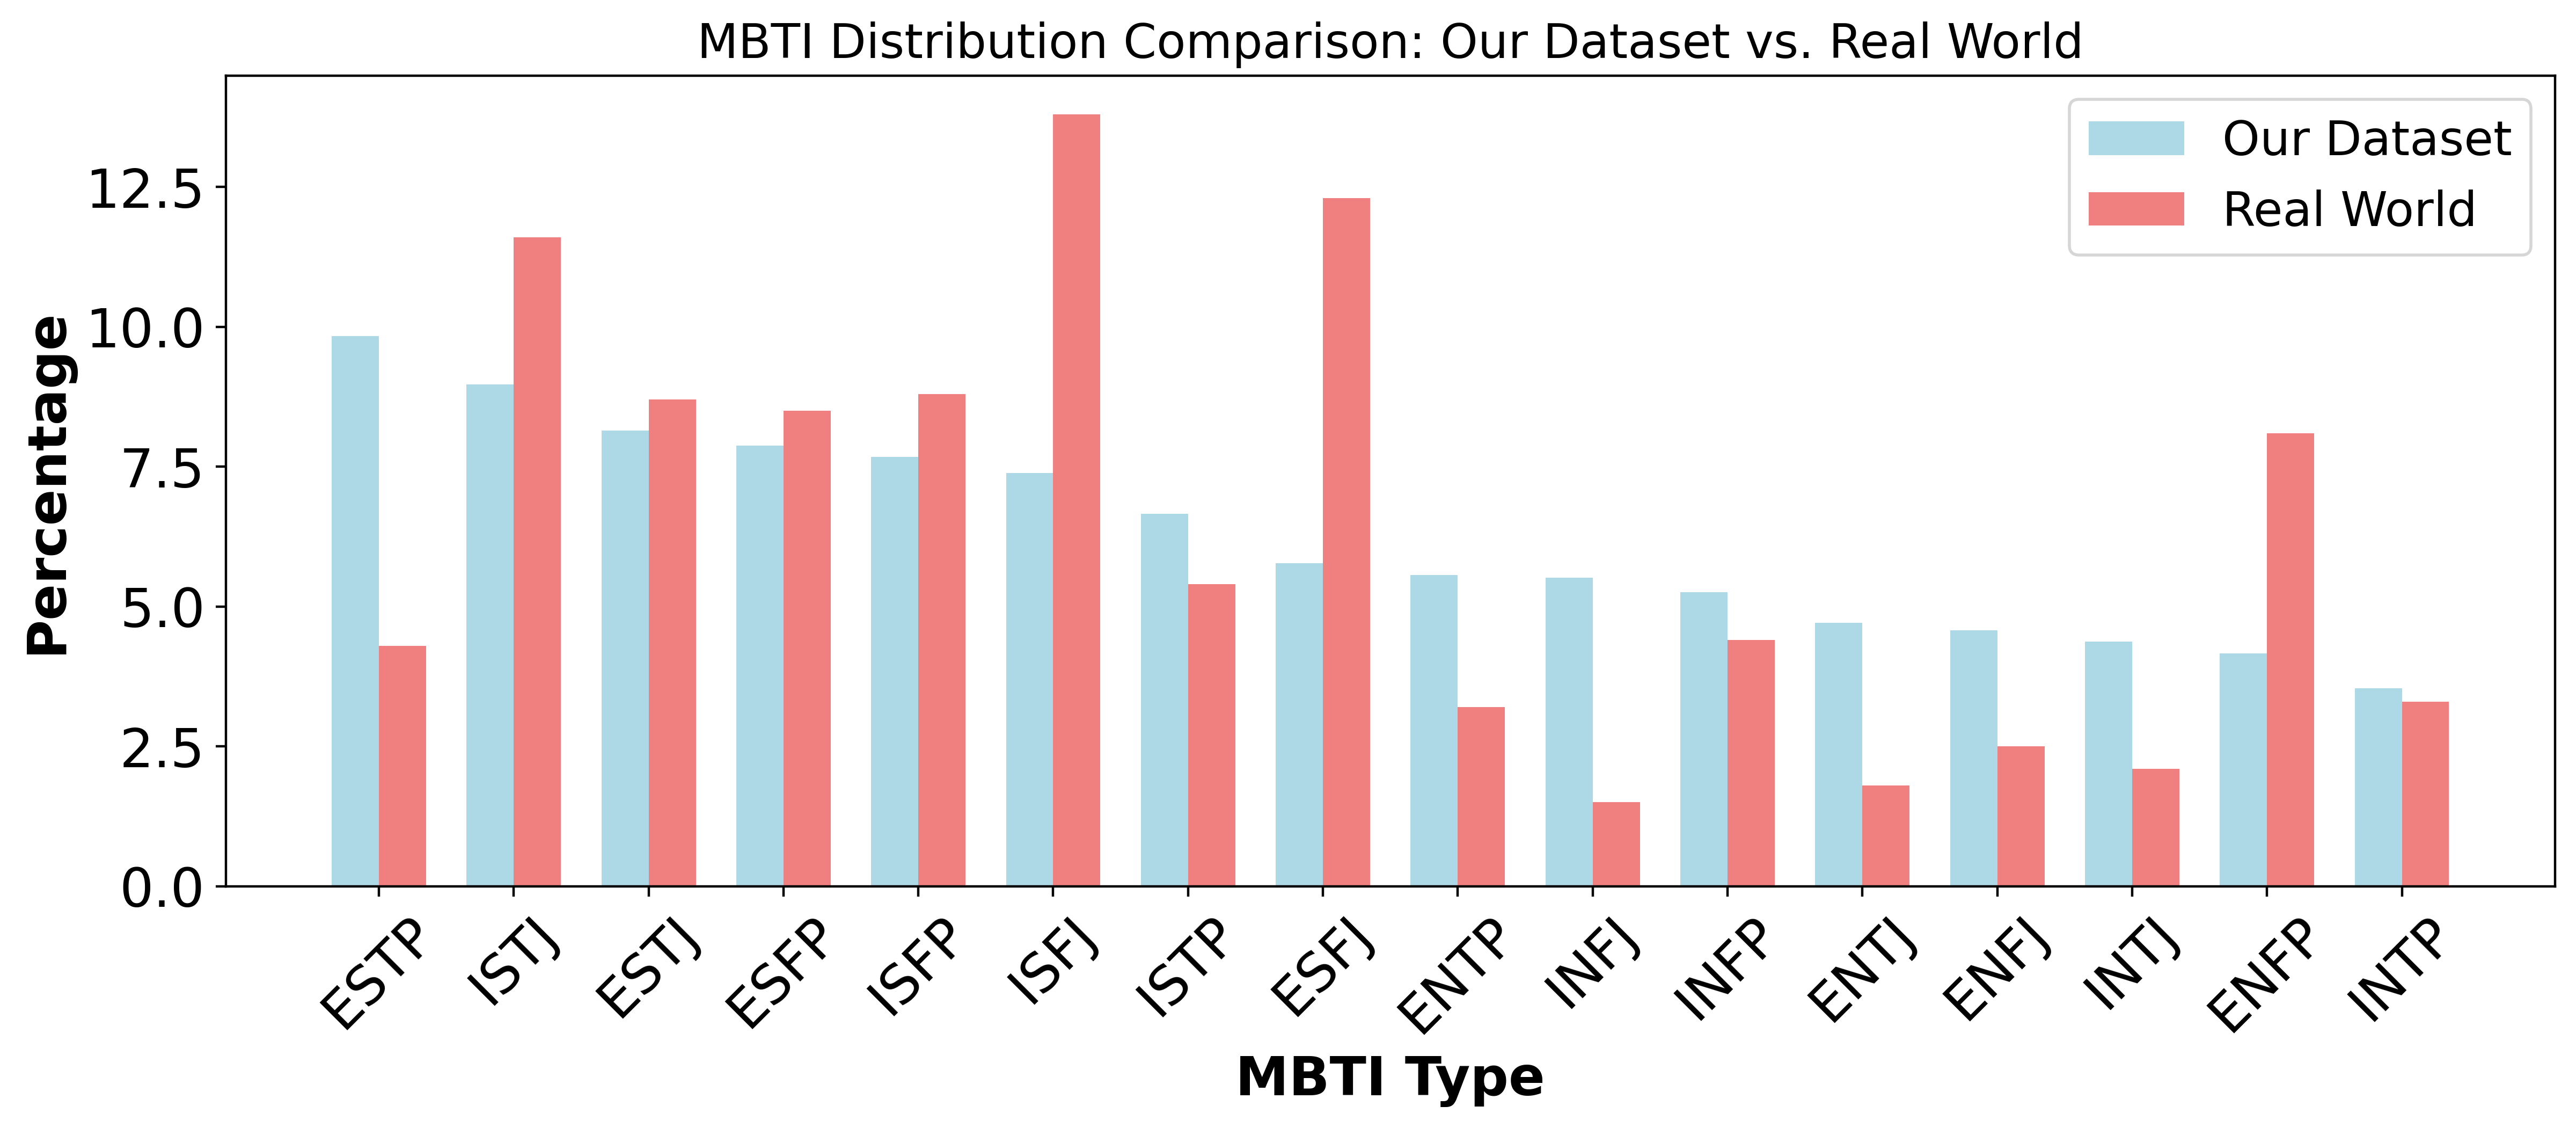

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'C:/Users/Lenovo/Desktop/final_list1.xlsx'
movies_df = pd.read_excel(file_path, sheet_name='movies')
television_df = pd.read_excel(file_path, sheet_name='Television')

# Extract the MBTI types from both DataFrames, ignoring the Enneagram types
movies_mbti = movies_df['personality'].str.extract(r'([A-Z]{4})')[0]
television_mbti = television_df['personality'].str.extract(r'([A-Z]{4})')[0]

# Combine the MBTI types from both DataFrames
combined_mbti = pd.concat([movies_mbti, television_mbti])

# Calculate the distribution of MBTI types
mbti_distribution = combined_mbti.value_counts().drop('XXXX')  # Exclude unspecified types

# Convert the distribution to percentages
total_responses = mbti_distribution.sum()
mbti_distribution_percentage = (mbti_distribution / total_responses) * 100

# Real-world MBTI distribution percentages
real_world_distribution = {
    'ISTJ': 11.6, 'ISFJ': 13.8, 'INFJ': 1.5, 'INTJ': 2.1,
    'ISTP': 5.4, 'ISFP': 8.8, 'INFP': 4.4, 'INTP': 3.3,
    'ESTP': 4.3, 'ESFP': 8.5, 'ENFP': 8.1, 'ENTP': 3.2,
    'ESTJ': 8.7, 'ESFJ': 12.3, 'ENFJ': 2.5, 'ENTJ': 1.8
}

real_world_distribution_series = pd.Series(real_world_distribution)
real_world_distribution_adjusted = real_world_distribution_series.reindex(mbti_distribution_percentage.index).fillna(0)

# Create a color map for consistency
color_map = plt.cm.tab20(range(len(real_world_distribution)))
mbti_color_mapping = {mbti: color for mbti, color in zip(real_world_distribution_series.index, color_map)}
movies_television_colors = [mbti_color_mapping.get(mbti, 'grey') for mbti in mbti_distribution_percentage.index]
real_world_colors = [mbti_color_mapping.get(mbti, 'grey') for mbti in real_world_distribution_adjusted.index]

# Plotting
plt.figure(figsize=(14, 5), dpi=400) 
bar_width = 0.35
r1 = range(len(mbti_distribution_percentage))
r2 = [x + bar_width for x in r1]
plt.rcParams.update({'font.size': 18})
plt.bar(r1, mbti_distribution_percentage, color='lightblue', width=bar_width, label='Our Dataset')
plt.bar(r2, real_world_distribution_adjusted, color='lightcoral', width=bar_width, label='Real World')

plt.xlabel('MBTI Type', fontweight='bold', fontsize=18)
plt.ylabel('Percentage', fontweight='bold', fontsize=18)
plt.xticks([r + bar_width/2 for r in range(len(mbti_distribution_percentage))], mbti_distribution_percentage.index, rotation=45)
plt.title('MBTI Distribution Comparison: Our Dataset vs. Real World', fontsize=16)
plt.legend(fontsize=16)
plt.show()


this is for dynamics

In [26]:
import json

file_path = 'E:/movies/movies/258_The Princess Bride (1987) output.json'
output_file_path = 'E:/movies/movies/adv.json'
# Sample JSON data for demonstration purposes
with open(file_path, 'r') as file:
    json_data = json.load(file)
# Function to extract answers containing 'Fondness'
def extract_fondness_answers(data):
    fondness_answers = []
    for scene in data:
        for content in scene['content']:
            answer = content.get('answer', '')
            if 'Dislike' in answer:
                fondness_answers.append(answer)
    return fondness_answers

# Extracting fondness answers
fondness_answers = extract_fondness_answers(json_data)
with open(output_file_path, 'w') as outfile:
    json.dump(fondness_answers, outfile, indent=4)


In [30]:
file_path = 'E:/movies/movies/adv.json'
with open(file_path, 'r') as file:
    json_data = json.load(file)
def extract_fondness_answers1(data):
    fondness_answers = []
    for answer in data:
        if 'Dislike' in answer:
            fondness_answers.append(answer)
    return fondness_answers

fondness_answers = extract_fondness_answers1(json_data)

# Path to your output JSON file
output_file_path = 'E:/movies/movies/adversion.json'

# Write the extracted answers to a new JSON file
with open(output_file_path, 'w') as outfile:
    json.dump(fondness_answers, outfile, indent=4)

In [31]:
import re

file_path = 'E:/movies/movies/adversion.json'
# Function to extract names before 'Fondness' tuples
def extract_names_before_fondness(data):
    names_with_fondness = []
    for answer in data:
        fondness_matches = re.findall(r'([a-zA-Z\s]+):\([a-zA-Z\s]+, Dislike\)', answer)
        names_with_fondness.extend(fondness_matches)
    return names_with_fondness
with open(file_path, 'r') as file:
    json_data = json.load(file)

names_with_fondness = extract_names_before_fondness(json_data)
output_file = 'E:/movies/movies/adv_name.json'
with open(output_file, 'w') as outfile:
    json.dump(names_with_fondness, outfile, indent=4)

In [33]:
import json

# Load the JSON file
file_path = 'E:/movies/movies/adv_name.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Remove duplicates
unique_data = list(set(data))
filtered_data = [name for name in unique_data if 'and' in name]

# Path to your output JSON file
output_file_path = 'E:/movies/movies/adv_name1.json'

# Write the unique data to a new JSON file
with open(output_file_path, 'w') as outfile:
    json.dump(filtered_data,outfile, indent=4)

filtered_data, output_file_path


(['Yvette and Louis',
  ' Marion and Patriots',
  ' McMurphy and Big Nurse',
  'LESTAT and LOUIS',
  ' Chorus Member and Stall Woman',
  'Ash and vision',
  ' Pat and Jake',
  ' \nSARAH and HOGGLE',
  'JOHNNY BOY and TONY',
  ' Samuel and Redcoat Sergeant',
  'Jules and Candice',
  ' BLANCHE and LADY INGRAM',
  '\nFrank and David Letterman',
  ' Ted and Surgeon',
  ' BLUNDER and unicorn',
  'Lorraine and Adam',
  'Vance and Jake',
  'Bertha and Rochester',
  'Kimble and Sykes',
  'TIFFANY and PAT',
  'Alice and Cindy',
  ' Bender and Brian',
  ' Jack and Officer Grabowski',
  ' Blix and Pox',
  'Somerset and Envelope and Photo',
  ' LRRH and Baker',
  ' Vince and Willy',
  ' Tejada and ORDAZ',
  ' Gold Leader and Death Star Commanders',
  ' Jane and Adele',
  'The walls and narrator',
  'ELIZABETH and STUCKEY',
  ' \nSilvie and CJ',
  'Gil and Inez',
  'Ted and Saturday Father',
  ' Tyler and Uptight Mommy',
  'JOHNNY BOY and his Mother',
  '\nShosanna and Fredrick',
  ' MARK and Beck'

In [34]:
# Adjusting the algorithm to combine reverse pairs

import json
import pandas as pd
from collections import defaultdict
# Load the JSON file
json_file_path = 'E:/movies/movies/adv_name1.json'
with open(json_file_path, 'r') as file:
    name_pairs = json.load(file)

# Load the Excel file
excel_file_path = "C:/Users/Lenovo/Desktop/final_list1.xlsx"
df = pd.read_excel(excel_file_path)

# Extract relevant columns




# Extract relevant columns
character_name_col = df['character_name']
mbti_col = df['personality']

# Create a dictionary for quick lookup of MBTI types
name_to_mbti = dict(zip(character_name_col.str.title(), mbti_col))

# Function to extract MBTI type from a string
def extract_mbti(mbti_string):
    return mbti_string.split()[0]

# Use defaultdict to store counts
mbti_count = defaultdict(int)

for pair in name_pairs:
    # Clean and split the names
    names = pair.strip().split(' and ')
    if len(names) == 2:
        name1, name2 = names
        mbti1 = name_to_mbti.get(name1.strip().title())
        mbti2 = name_to_mbti.get(name2.strip().title())
        if mbti1 and mbti2:
            mbti1 = extract_mbti(mbti1)
            mbti2 = extract_mbti(mbti2)
            # Ensure the pair is always in the same order
            mbti_pair = tuple(sorted((mbti1, mbti2)))
            mbti_count[mbti_pair] += 1

# Convert the result to a DataFrame for better visualization
mbti_df = pd.DataFrame(mbti_count.items(), columns=['MBTI_Pair', 'Count'])

# Save the DataFrame to a CSV file for easy sharing and viewing
mbti_df.to_csv('E:/movies/movies/adv.csv', index=False)

print("The combined MBTI pairs and their counts have been saved to 'mbti_pairs_count.csv'.")



The combined MBTI pairs and their counts have been saved to 'mbti_pairs_count.csv'.


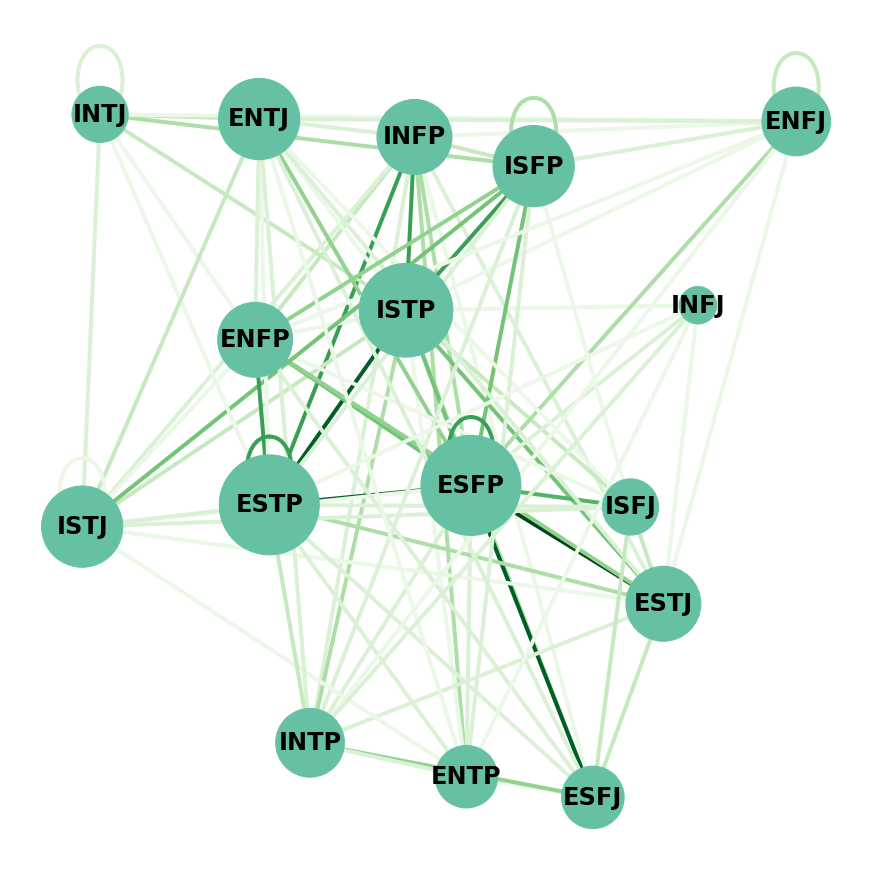

In [38]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'E:/movies/movies/adv.csv'  # Update with the correct path
data = pd.read_csv(file_path)

# Extract pairs and counts
data['MBTI_Pair'] = data['MBTI_Pair'].apply(lambda x: eval(x))
edges = [(pair[0], pair[1], count) for pair, count in zip(data['MBTI_Pair'], data['Count'])]

# Create a graph
G = nx.Graph()
for u, v, weight in edges:
    G.add_edge(u, v, weight=weight)

# Adjust node size based on degree (number of connections)
max_degree = max(dict(G.degree()).values())
node_size = [10000 * ((G.degree(node) / max_degree) **2 ) for node in G.nodes()]
# Adjust edge color based on weight
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
max_weight = max(edge_weights)
edge_colors = [plt.cm.Greens( weight / max_weight) for weight in edge_weights]
edge_widths = [2 * (weight / max_weight) for weight in edge_weights]
# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.9, iterations=5)  # Position nodes using the spring layout
nx.draw(G, pos, with_labels=True, node_size=node_size, node_color="#66c1a4", font_size=24, font_weight="bold", edge_color=edge_colors, width=4)

plt.show()


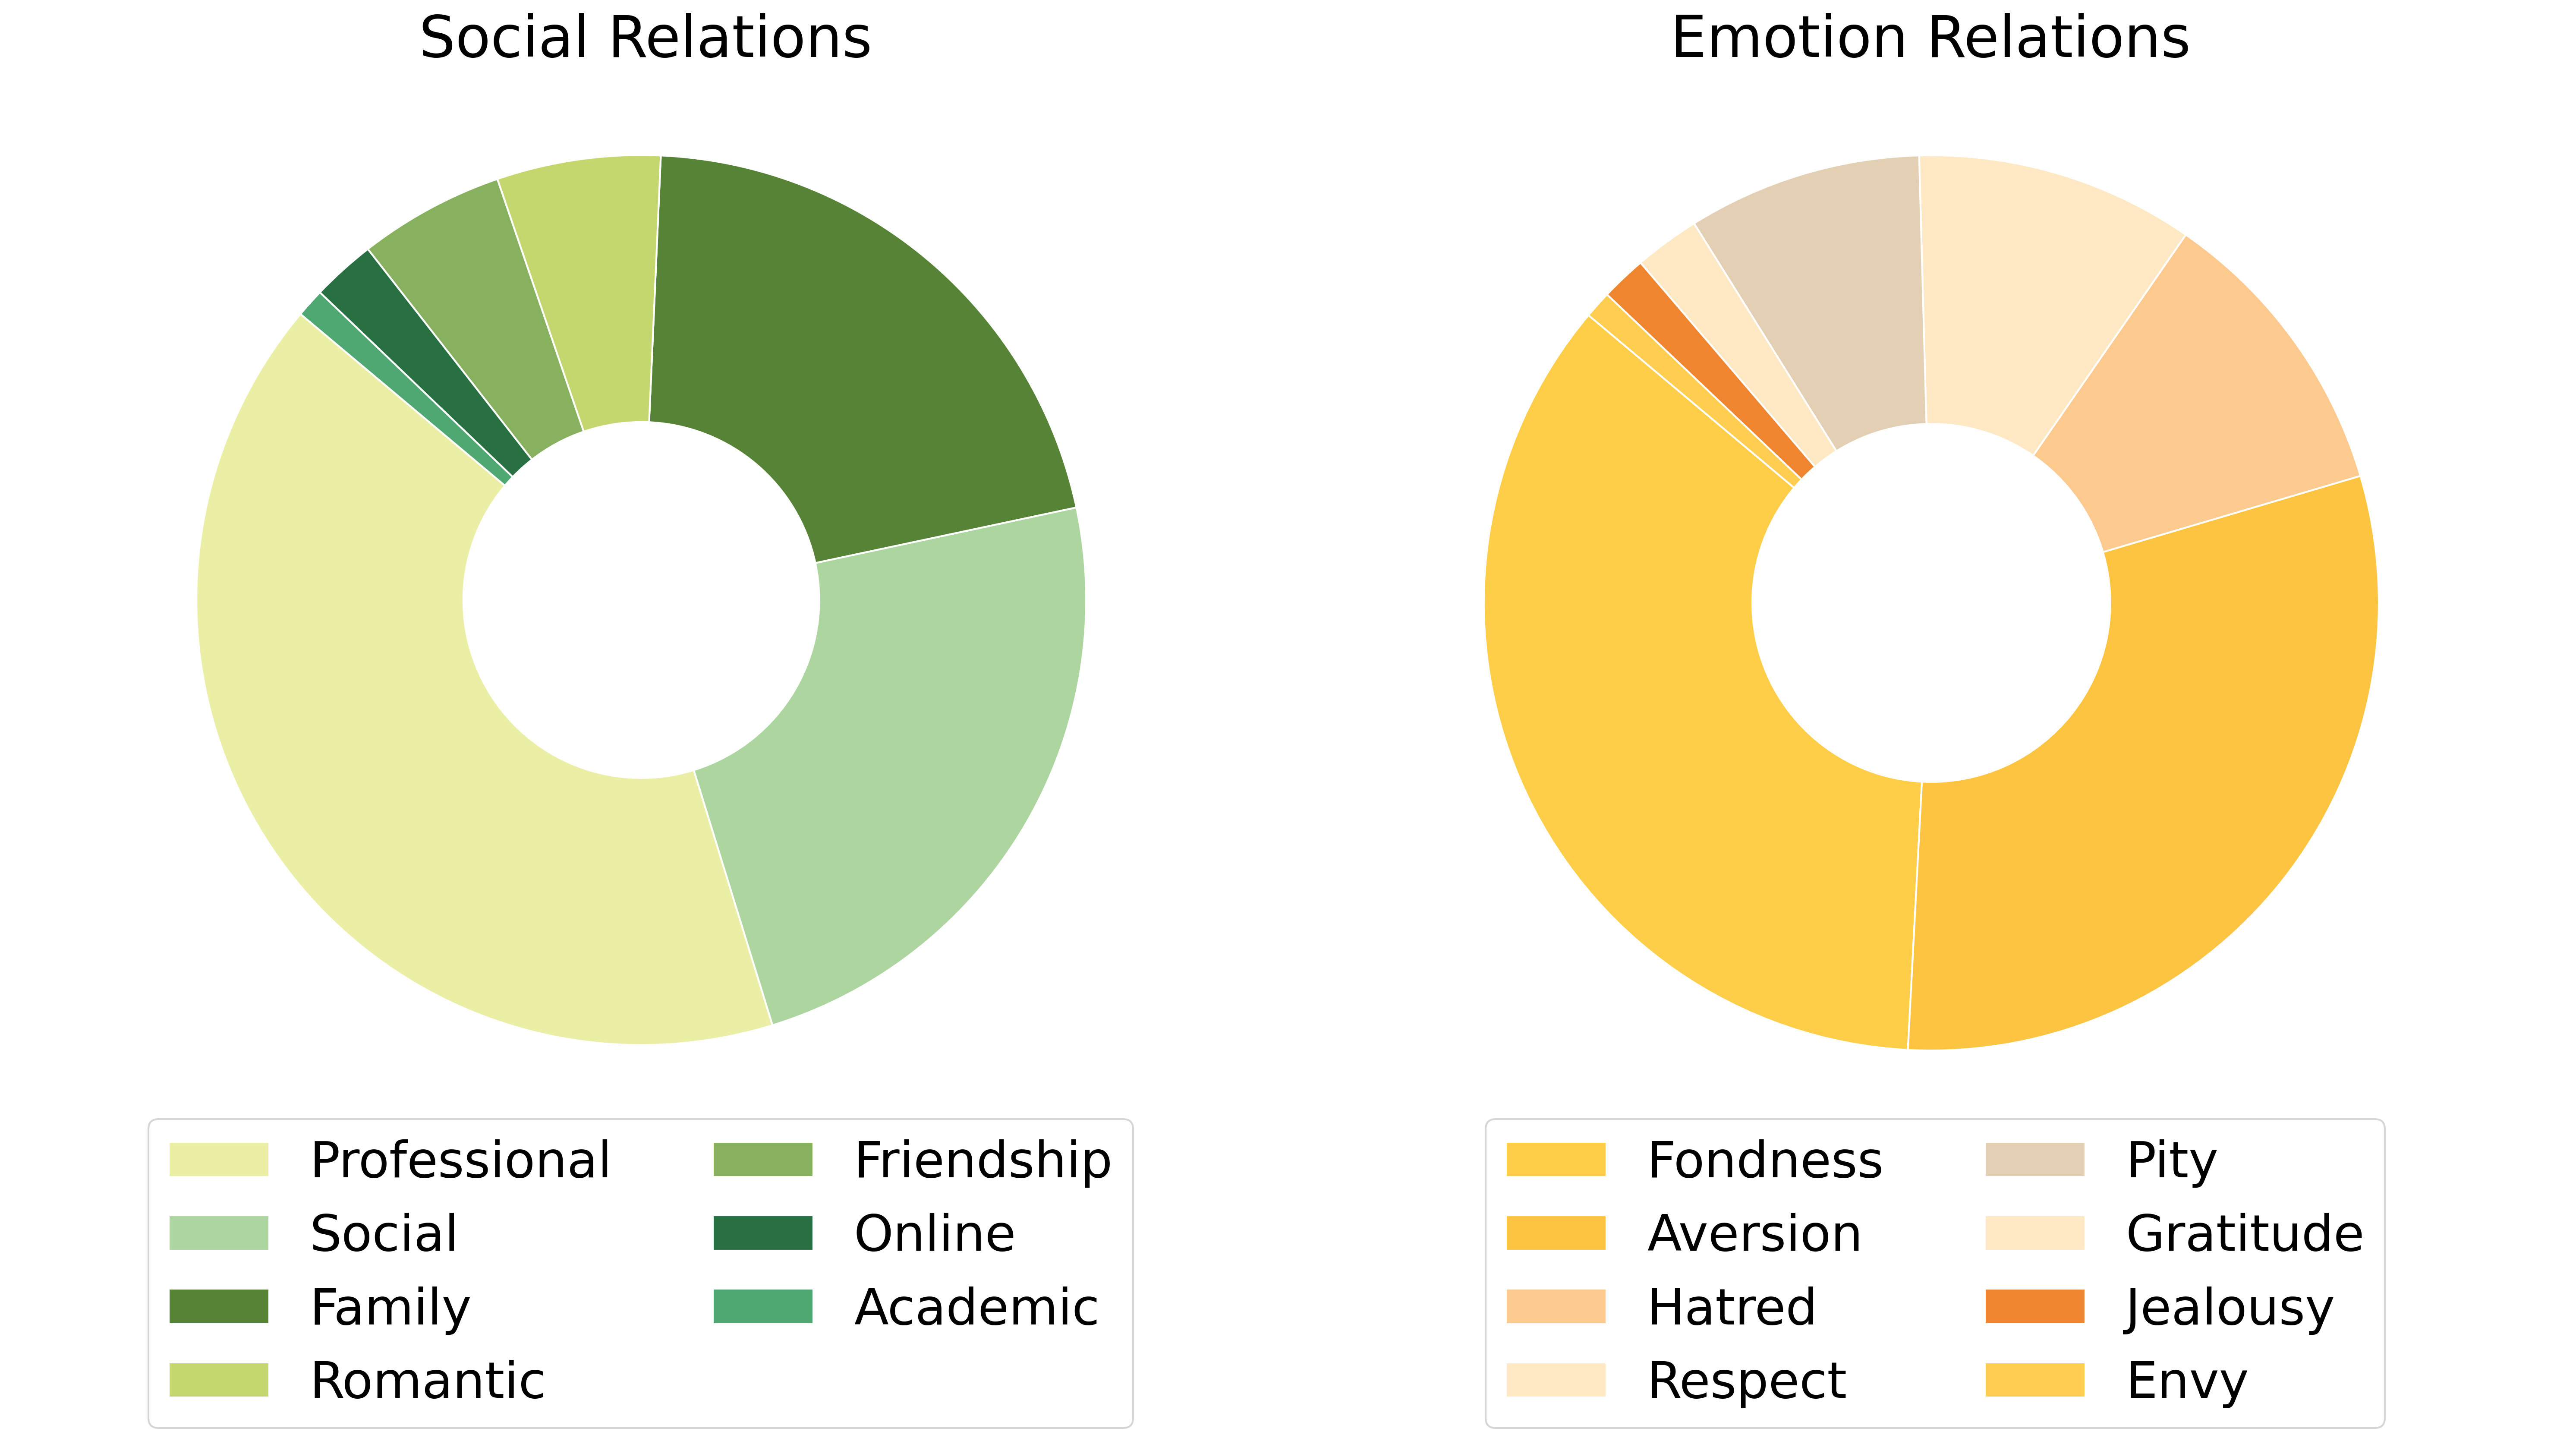

In [25]:
import matplotlib.pyplot as plt

# Data for Social Relationship Pie Chart
social_labels = ['Family', 'Friendship', 'Romantic', 'Professional',
                 'Social', 'Academic', 'Online']
social_sizes = [8027, 2026, 2276, 15652, 9025, 398, 886]
# Updated color palette for Social Relationships
social_colors = ['#578336', '#87b15f', '#c4d76e', '#ebefa5', '#acd59f', '#4fa772', '#287042']

# Data for Emotional Relationship Pie Chart
emotional_labels = ['Fondness', 'Jealousy', 'Aversion', 'Pity',
                    'Respect', 'Hatred', 'Envy', 'Gratitude']
emotional_sizes = [1092+8381, 441, 7582+585, 1221+1051, 2702, 350+2548, 265, 635]
# Updated color palette for Emotional Relationships
emotional_colors = ['#ffce49', '#ef852f', '#fdc441', '#e3cfb4', '#ffe8c4', '#fcc98f', '#ffce50', '#ffe8c4']

# Function to calculate percentage
def calc_percentages(sizes):
    total = sum(sizes)
    percentages = [f'{(size/total)*100:.1f}%' for size in sizes]
    return percentages

# Social Relationships Pie Chart
social_combined = sorted(zip(social_labels, social_sizes, social_colors), key=lambda x: x[1], reverse=True)
social_labels_sorted, social_sizes_sorted, social_colors_sorted = zip(*social_combined)
social_percentages = calc_percentages(social_sizes_sorted)
social_legend_labels = [f'{label}' for label, in zip(social_labels_sorted)]

# Emotional Relationships Pie Chart - sorting
emotional_combined = sorted(zip(emotional_labels, emotional_sizes, emotional_colors), key=lambda x: x[1], reverse=True)
emotional_labels_sorted, emotional_sizes_sorted, emotional_colors_sorted = zip(*emotional_combined)
emotional_percentages = calc_percentages(emotional_sizes_sorted)
emotional_legend_labels = [f'{label}' for label, in zip(emotional_labels_sorted)]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), dpi=300)

# Social Relationships Pie Chart
wedges1, texts1 = ax1.pie(social_sizes_sorted, colors=social_colors_sorted, startangle=140, wedgeprops=dict(width=0.6, edgecolor='w'))
ax1.set_title('Social Relations', fontsize=32)
ax1.axis('equal')

# Emotional Relationships Pie Chart
wedges2, texts2 = ax2.pie(emotional_sizes_sorted, colors=emotional_colors_sorted, startangle=140, wedgeprops=dict(width=0.6, edgecolor='w'))
ax2.set_title('Emotion Relations', fontsize=32)
ax2.axis('equal')

# Legend for Social Relationships
legend1 = fig.legend(wedges1, social_legend_labels, loc='upper center', bbox_to_anchor=(0.25, 0.15), ncol=2, fontsize=28)

# Legend for Emotional Relationships
legend2 = fig.legend(wedges2, emotional_legend_labels, loc='upper center', bbox_to_anchor=(0.75, 0.15), ncol=2, fontsize=28)

plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit legends
plt.show()
